### **Import**

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

### **Reading data**

In [2]:
path_ant = "D:/work/stage m1/amak/amakaque/eval_Ant.csv"
path_bee = "D:/work/stage m1/amak/amakaque/eval_Bee.csv"
path_a_bee = "D:/work/stage m1/amak/amakaque/eval_A-Bee.csv"
path_sm = "D:/work/stage m1/amak/amakaque/eval_Spider-Monkey.csv"
path_fa = "D:/work/stage m1/amak/amakaque/eval_Firefly.csv"
path_bfo = "D:/work/stage m1/amak/amakaque/eval_BFO.csv"
path_smac = "D:/work/stage m1/amak/amakaque/eval_Smac.csv"

In [3]:
def rawToList(path):
    nbr_eval = []
    raw_eval = pandas.read_csv(path, header=None, index_col=0, squeeze=True).to_dict().get(1)
    for key in raw_eval.keys():
        if key == "cycle":
            pass
        else:
            nbr_eval += [int(raw_eval.get(key))]

    solution = []
    raw_sol = pandas.read_csv(path, header=None, index_col=0, squeeze=True).to_dict().get(2)
    for key in raw_sol.keys():
        if key == "cycle":
            pass
        else:
            solution += [float(raw_sol.get(key))]
    
    return nbr_eval, solution

In [4]:
# ant
nbr_eval_ant, solution_ant = rawToList(path_ant)

# bee
nbr_eval_bee, solution_bee = rawToList(path_bee)

# a_bee
nbr_eval_a_bee, solution_a_bee = rawToList(path_a_bee)

# sm
nbr_eval_sm, solution_sm = rawToList(path_sm)

# fa
nbr_eval_fa, solution_fa = rawToList(path_fa)

# bfo
nbr_eval_bfo, solution_bfo = rawToList(path_bfo)

# smac
nbr_eval_smac, solution_smac = rawToList(path_smac)


In [5]:
print(nbr_eval_bfo)

[50, 12879, 25856, 38830, 51885, 64824, 78081, 91025, 104154, 117473, 130838, 144344, 157732, 171029, 184374, 197849, 211199, 224640, 238034, 251598, 264938, 278248, 291617, 304901, 318235, 331616, 345106, 358506, 371782, 385147, 398522, 411901, 425372, 438769, 452193, 465695, 479247, 492394, 505768, 519365, 532581, 545938, 559275, 572566, 586033, 599075, 612496, 625988, 639266, 652649, 666323, 679701, 693165, 706581, 719947, 733358, 746751, 760217, 773535, 786856, 800207, 813318, 826825, 840412, 853878, 867184, 880534, 894049, 907363, 921013, 934580, 948216, 961605, 975041, 988307]


### **Plot**

In [6]:
cycle = max(len(nbr_eval_ant), len(nbr_eval_bee))

x_ticks = []
x_value = []

step = 1_000
for i in range(0, cycle+1, step):
    x_value += [int(i/1000)]
    x_ticks += [i]

In [7]:
def build_best_sol(sols):
    max_sol = [sols[0]]
    
    for sol in sols[1:]:
        if max_sol[-1] > sol:
            max_sol.append(sol)
        else:
            max_sol.append(max_sol[-1])
    return max_sol

max_sol_ant = build_best_sol(solution_ant)
max_sol_bee = build_best_sol(solution_bee)
max_sol_a_bee = build_best_sol(solution_a_bee)
max_sol_sm = build_best_sol(solution_sm)
max_sol_fa = build_best_sol(solution_fa)
max_sol_bfo = build_best_sol(solution_bfo)
max_sol_smac = build_best_sol(solution_smac)

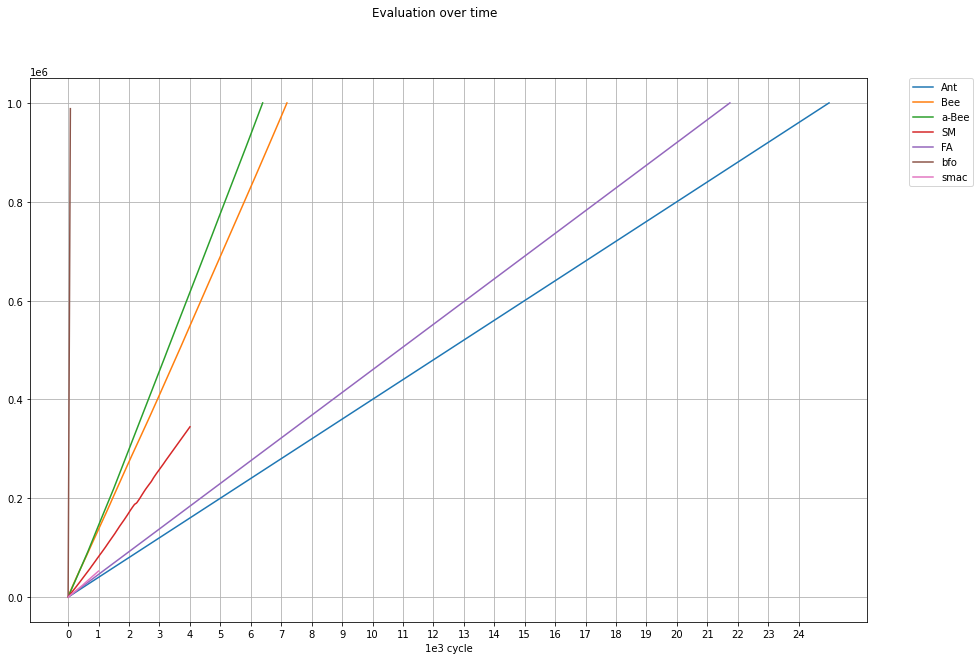

In [8]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.grid(True)
plt.xticks(x_ticks, x_value)
plt.xlabel('1e3 cycle')

plt.plot([i for i in range(len(nbr_eval_ant))], nbr_eval_ant, label="Ant")
plt.plot([i for i in range(len(nbr_eval_bee))], nbr_eval_bee, label="Bee")
plt.plot([i for i in range(len(nbr_eval_a_bee))], nbr_eval_a_bee, label="a-Bee")
plt.plot([i for i in range(len(nbr_eval_sm))], nbr_eval_sm, label="SM")
plt.plot([i for i in range(len(nbr_eval_fa))], nbr_eval_fa, label="FA")
plt.plot([i for i in range(len(nbr_eval_bfo))], nbr_eval_bfo, label="bfo")
plt.plot([i for i in range(len(nbr_eval_smac))], nbr_eval_smac, label="smac")

plt.suptitle("Evaluation over time")
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)

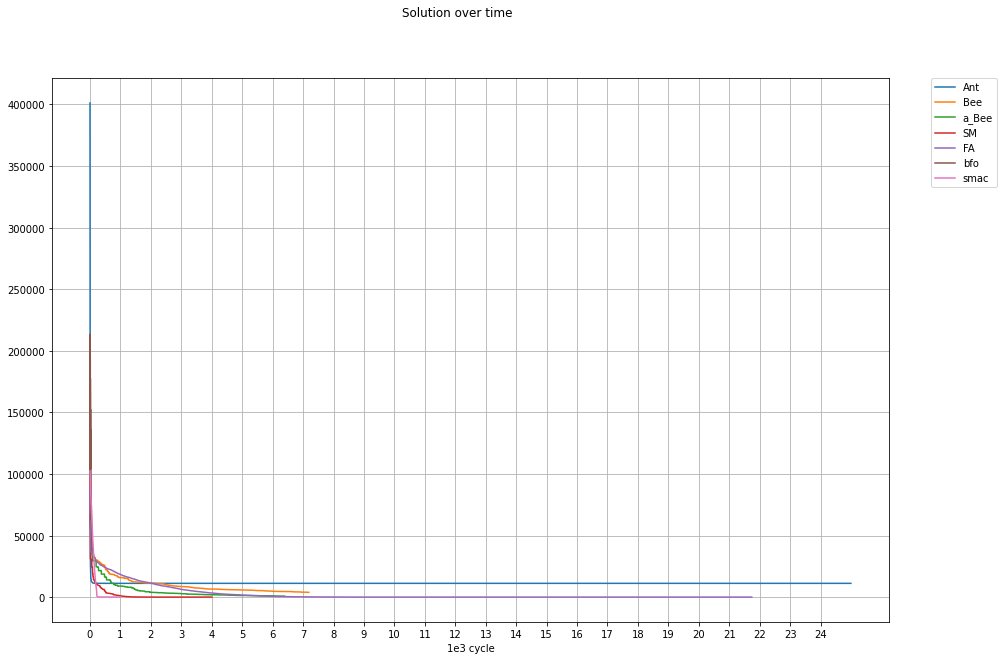

In [9]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.grid(True)
plt.xticks(x_ticks, x_value)
plt.xlabel('1e3 cycle')

plt.plot([i for i in range(len(solution_ant))], solution_ant, label="Ant")
plt.plot([i for i in range(len(solution_bee))], solution_bee, label="Bee")
plt.plot([i for i in range(len(solution_a_bee))], solution_a_bee, label="a_Bee")
plt.plot([i for i in range(len(solution_sm))], solution_sm, label="SM")
plt.plot([i for i in range(len(solution_fa))], solution_fa, label="FA")
plt.plot([i for i in range(len(solution_bfo))], solution_bfo, label="bfo")
plt.plot([i for i in range(len(solution_smac))], solution_smac, label="smac")

plt.suptitle("Solution over time")
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)

(-1.0, 200000.0)

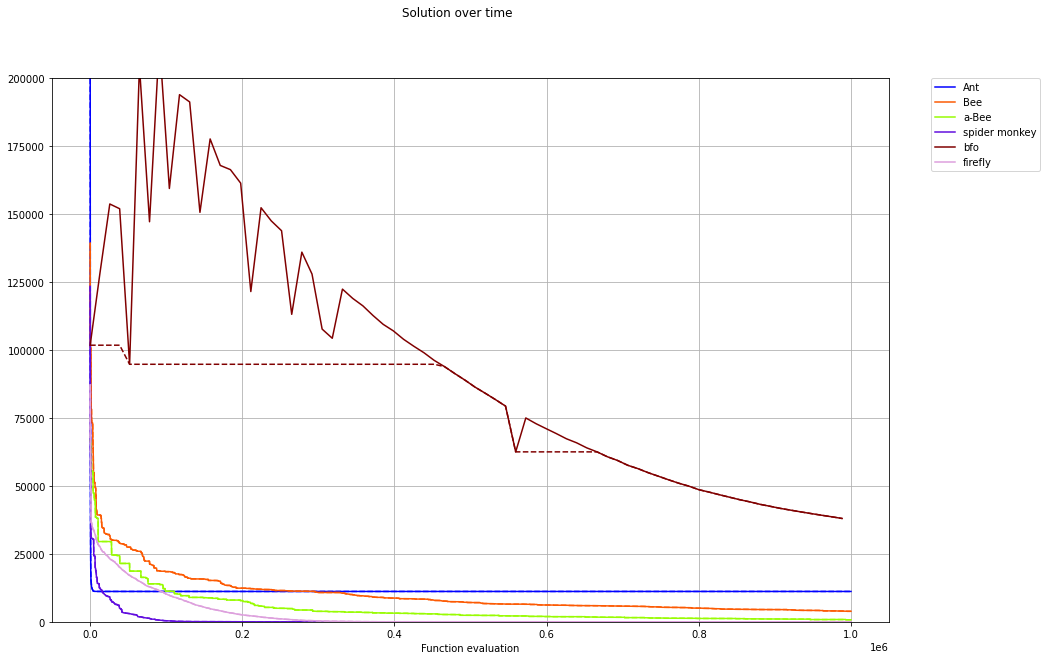

In [12]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.grid(True)
plt.xlabel('Function evaluation')

plt.plot(nbr_eval_ant, solution_ant, label="Ant", color="b")
plt.plot(nbr_eval_ant, max_sol_ant, color="b", linestyle="--")

plt.plot(nbr_eval_bee, solution_bee, label="Bee", color="#fc5a03")
plt.plot(nbr_eval_bee, max_sol_bee, color="#fc5a03", linestyle="--")

plt.plot(nbr_eval_a_bee, solution_a_bee, label="a-Bee", color="#98fc03")
plt.plot(nbr_eval_a_bee, max_sol_a_bee, color="#98fc03", linestyle="--")

plt.plot(nbr_eval_sm, solution_sm, label="spider monkey", color="#610DDE")
plt.plot(nbr_eval_sm, max_sol_sm, color="#610DDE", linestyle="--")


plt.plot(nbr_eval_bfo, solution_bfo, label="bfo", color="#800000")
plt.plot(nbr_eval_bfo, max_sol_bfo, color="#800000", linestyle="--")

plt.plot(nbr_eval_fa, solution_fa, label="firefly", color="#DDA0DD")
plt.plot(nbr_eval_fa, max_sol_fa, color="#DDA0DD", linestyle="--")

plt.suptitle("Solution over time")
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)

plt.ylim(-1, 200_000)
# plt.xlim(-1, 50000)